In [1]:
#Launch commands to automatically reload modules
%load_ext autoreload
%autoreload 2

In [ ]:
#Import packages to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

In [ ]:
#Load dataset into a dataframe(df)
df = pd.read_csv('../data/raw/GlobalDietaryDatabase_V2.csv')

**Data Exploration**

In [4]:
#Display dimensions of the dataframe(df)
df.shape

(185, 74)

In [5]:
#Display summary information of dataframe(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 74 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Unnamed: 0                                           185 non-null    int64  
 1   Entity                                               185 non-null    object 
 2   superregion2                                         185 non-null    object 
 3   iso3                                                 185 non-null    object 
 4   Fruits                                               185 non-null    float64
 5   Non-starchy vegetables                               185 non-null    float64
 6   Potatoes                                             185 non-null    float64
 7   Other starchy vegetables                             185 non-null    float64
 8   Beans and legumes                                    185 non-null    f

In [6]:
#Display descriptive statistics of dataframe(df)
df.describe(include='all')

,Unnamed: 0,Entity,superregion2,iso3,Fruits,Non-starchy vegetables,Potatoes,Other starchy vegetables,Beans and legumes,Nuts and seeds,...,"Supply_ Fish, shellfish and their products",Supply_ Meat and meat products,Supply_ Vegetables and their products,Supply_ Fruits and their products,Supply_ Fats and oils,Supply_ Sweets and sugars,Supply_ Spices and condiments,Supply_ Beverages,Supply_ Foods for particular nutritional uses,Supply_ Miscellaneous
count,185.000000,185,185,185,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,...,179,179,179,179,179,179,179,179,171,169
unique,NaN,185,7,185,NaN,NaN,NaN,NaN,NaN,NaN,...,80,154,98,119,163,157,48,124,17,56
top,NaN,Afghanistan,SSA,AFG,NaN,NaN,NaN,NaN,NaN,NaN,...,15,87,75,125,297,413,4,12,0,0
freq,NaN,1,48,1,NaN,NaN,NaN,NaN,NaN,NaN,...,6,3,6,5,3,3,17,4,57,32
mean,93.000000,NaN,NaN,NaN,102.776149,149.202966,68.755287,37.328449,29.987726,9.878565,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,53.549043,NaN,NaN,NaN,59.449952,75.283922,77.094735,27.566880,28.207794,10.463191,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,3.850213,20.231450,0.024087,1.036937,1.042146,0.031961,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,47.000000,NaN,NaN,NaN,69.361588,103.544792,23.545437,21.243066,13.671019,3.125331,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,93.000000,NaN,NaN,NaN,91.032626,135.520147,44.911503,31.581613,25.935244,7.380981,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,139.000000,NaN,NaN,NaN,121.463787,174.175199,84.192747,45.263637,37.685842,12.272771,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#View first 5 rows of data
df.head()

,Unnamed: 0,Entity,superregion2,iso3,Fruits,Non-starchy vegetables,Potatoes,Other starchy vegetables,Beans and legumes,Nuts and seeds,...,"Supply_ Fish, shellfish and their products",Supply_ Meat and meat products,Supply_ Vegetables and their products,Supply_ Fruits and their products,Supply_ Fats and oils,Supply_ Sweets and sugars,Supply_ Spices and condiments,Supply_ Beverages,Supply_ Foods for particular nutritional uses,Supply_ Miscellaneous
0,1,Afghanistan,SAARC,AFG,65.697036,98.080124,21.195808,44.892140,103.830266,31.205695,...,1,48,27,76,222,134,3,1,0,1
1,2,Angola,SSA,AGO,119.746980,308.837004,346.377109,52.662482,37.799557,11.612246,...,28,106,14,112,267,135,0,85,4,2
2,3,Albania,FSU,ALB,138.874360,129.083757,185.783632,73.031694,40.181361,12.272771,...,16,263,211,393,297,308,2,83,1,19
3,4,United Arab Emirates,MENA,ARE,107.577820,123.284747,182.972287,57.068126,40.563807,31.729379,...,48,353,106,176,718,223,34,36,6,9
4,5,Argentina,LAC,ARG,93.995787,123.803276,51.336122,7.010755,3.575009,1.564769,...,11,601,52,91,552,400,3,125,NaN,NaN


In [8]:
#View last 5 rows of data
df.tail()

,Unnamed: 0,Entity,superregion2,iso3,Fruits,Non-starchy vegetables,Potatoes,Other starchy vegetables,Beans and legumes,Nuts and seeds,...,"Supply_ Fish, shellfish and their products",Supply_ Meat and meat products,Supply_ Vegetables and their products,Supply_ Fruits and their products,Supply_ Fats and oils,Supply_ Sweets and sugars,Supply_ Spices and condiments,Supply_ Beverages,Supply_ Foods for particular nutritional uses,Supply_ Miscellaneous
180,181,Samoa,Asia,WSM,140.298982,336.380953,13.158776,20.610665,231.055331,26.075091,...,100,479,18,247,388,341,14,70,0,11
181,182,Yemen,MENA,YEM,39.336626,58.530138,80.552301,37.109278,28.888928,3.392899,...,5,79,16,54,196,291,64,12,2,11
182,183,South Africa,SSA,ZAF,32.667852,131.801080,54.860450,39.778680,32.258336,0.226813,...,12,350,33,26,452,312,5,190,0,0
183,184,Zambia,SSA,ZMB,51.185607,195.758520,23.045660,20.531105,20.586087,19.666407,...,25,99,17,9,204,146,2,41,0,3
184,185,Zimbabwe,SSA,ZWE,83.372898,141.235245,44.911503,33.138091,18.917248,3.126727,...,4,314,10,23,347,190,1,63,0,6


In [9]:
#Count the number of duplicate rows in the dataframe
df[df.duplicated()].shape

(0, 74)

In [10]:
#Check for null values in dataset and display
null_values = df.isnull().sum()
print("Null values in the dataset:")
print(null_values)

Null values in the dataset:
Unnamed: 0                                        0
Entity                                            0
superregion2                                      0
iso3                                              0
Fruits                                            0
                                                 ..
Supply_ Sweets and sugars                         6
Supply_ Spices and condiments                     6
Supply_ Beverages                                 6
Supply_ Foods for particular nutritional uses    14
Supply_ Miscellaneous                            16
Length: 74, dtype: int64


**Data Preparation**

In [11]:
#Make a copy of the dataframe(df) to be cleaned
df_cleaned = df.copy()

In [12]:
#Replace null value with zero
df_cleaned.fillna(0, inplace=True)

In [13]:
df_cleaned.isnull().sum()

Unnamed: 0                                       0
Entity                                           0
superregion2                                     0
iso3                                             0
Fruits                                           0
                                                ..
Supply_ Sweets and sugars                        0
Supply_ Spices and condiments                    0
Supply_ Beverages                                0
Supply_ Foods for particular nutritional uses    0
Supply_ Miscellaneous                            0
Length: 74, dtype: int64

In [14]:
#Identify column data types
column_types = df_cleaned.dtypes

# Identify categorical columns
categorical_columns = column_types[column_types == 'object'].index.tolist()

# Print the list of categorical columns
print("Categorical columns:", categorical_columns)

Categorical columns: ['Entity', 'superregion2', 'iso3', 'Continent', 'Unit', 'Supply_ All food groups', 'Supply_ All food groups (excluding beverages)', 'Supply_ Cereals and their products', 'Supply_ Roots, tubers, plantains and their products', 'Supply_ Pulses, seeds and nuts and their products', 'Supply_ Milk and milk products', 'Supply_ Eggs and their products', 'Supply_ Fish, shellfish and their products', 'Supply_ Meat and meat products', 'Supply_ Vegetables and their products', 'Supply_ Fruits and their products', 'Supply_ Fats and oils', 'Supply_ Sweets and sugars', 'Supply_ Spices and condiments', 'Supply_ Beverages', 'Supply_ Foods for particular nutritional uses', 'Supply_ Miscellaneous']


In [16]:
#Encode categorical variables
categorical_columns = ['Entity', 'superregion2', 'iso3', 'Continent', 'Unit', 'Supply_ All food groups',
                       'Supply_ All food groups (excluding beverages)', 'Supply_ Cereals and their products',
                       'Supply_ Roots, tubers, plantains and their products', 'Supply_ Pulses, seeds and nuts and their products',
                       'Supply_ Milk and milk products', 'Supply_ Eggs and their products', 'Supply_ Fish, shellfish and their products',
                       'Supply_ Meat and meat products', 'Supply_ Vegetables and their products', 'Supply_ Fruits and their products',
                       'Supply_ Fats and oils', 'Supply_ Sweets and sugars', 'Supply_ Spices and condiments', 'Supply_ Beverages',
                       'Supply_ Foods for particular nutritional uses', 'Supply_ Miscellaneous']

# One-hot encoding
df_encoded = pd.get_dummies(df_cleaned, columns=categorical_columns)

# Ensure all categorical columns are of type 'object'
for col in categorical_columns:
    df_cleaned[col] = df_cleaned[col].astype(str)

# Label encoding
le = LabelEncoder()
for col in categorical_columns:
    df_cleaned[col] = le.fit_transform(df_cleaned[col])

# Print the updated DataFrame
print(df_cleaned.head())

   Unnamed: 0  Entity  superregion2  iso3      Fruits  Non-starchy vegetables   
0           1       0             5     0   65.697036               98.080124  \
1           2       3             6     1  119.746980              308.837004   
2           3       1             1     2  138.874360              129.083757   
3           4     174             4     3  107.577820              123.284747   
4           5       5             3     4   93.995787              123.803276   

     Potatoes  Other starchy vegetables  Beans and legumes  Nuts and seeds   
0   21.195808                 44.892140         103.830266       31.205695  \
1  346.377109                 52.662482          37.799557       11.612246   
2  185.783632                 73.031694          40.181361       12.272771   
3  182.972287                 57.068126          40.563807       31.729379   
4   51.336122                  7.010755           3.575009        1.564769   

   ...  Supply_ Fish, shellfish and their pr

**Correlation Analysis**

C:\Users\joann\AppData\Local\pypoetry\Cache\virtualenvs\ilab_capstone_project-f_xTukCu-py3.9\lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\joann\AppData\Local\pypoetry\Cache\virtualenvs\ilab_capstone_project-f_xTukCu-py3.9\lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


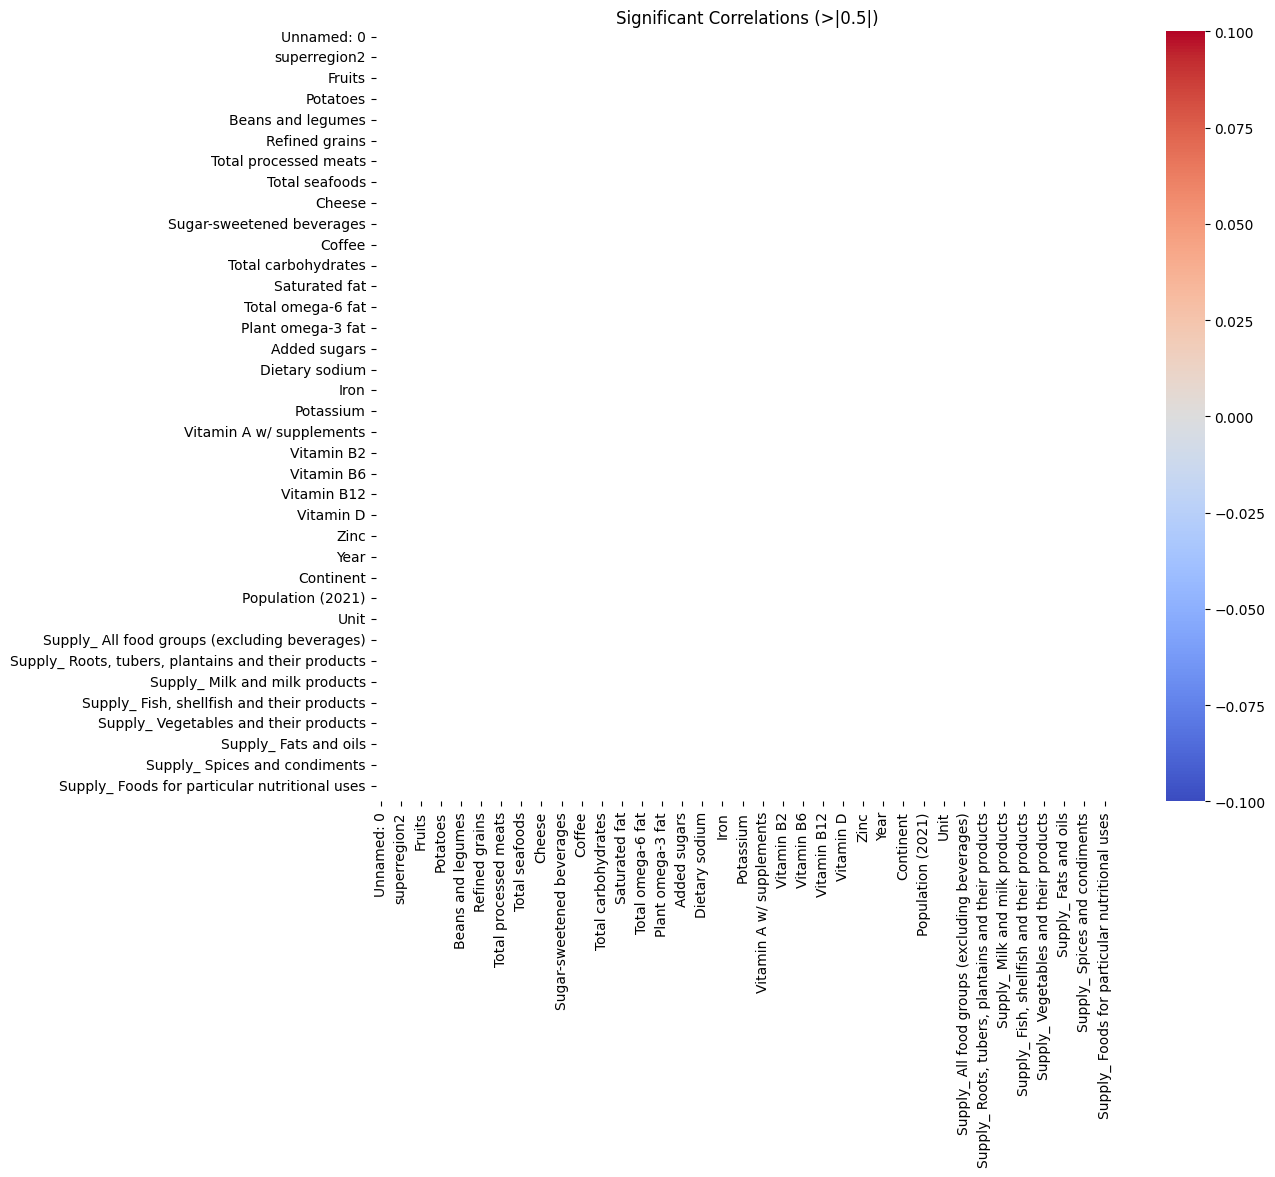

In [17]:
# Calculate correlation matrix
correlation_matrix = df_cleaned.corr()

# Set threshold for correlation
threshold = 1  # Adjust threshold as needed

# Filter correlation matrix to show only correlations above the threshold
significant_correlations = correlation_matrix[(correlation_matrix > threshold) | (correlation_matrix < -threshold)]

# Plot filtered correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(significant_correlations, annot=True, cmap='coolwarm')
plt.title('Significant Correlations (>|0.5|)')
plt.show()

**Feature Engineering**

In [18]:
df_cleaned['protein_carb_ratio'] = df_cleaned['Total protein'] / df_cleaned['Total carbohydrates']

**Data Modelling**

In [19]:
#Obesity is target variable
X = df_cleaned.drop(columns=['ObesityRate'])
y = df_cleaned['ObesityRate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming X_train, X_test, y_train, y_test are already defined
# Create and fit the linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Optionally, you can also print the coefficients and intercept of the linear regression model
print("Coefficients:", linear_reg.coef_)
print("Intercept:", linear_reg.intercept_)

Mean Squared Error: 183.84207865955977
Coefficients: [-5.49285949e-03  9.88485903e-03  1.27714355e+00 -5.49285950e-03
 -6.30462139e-03  1.65245341e-02 -1.46251548e-02  3.58262240e-03
  8.69388167e-03  3.43580536e-03 -6.39273718e-03 -2.93426917e-02
 -1.88973729e-02 -2.54819114e-02  1.97304378e-02  1.59844474e-01
  2.12613049e-01 -1.10177606e-01 -1.43522314e-02 -5.19358479e-02
 -1.29837207e+00  1.75962742e+00 -1.00232888e+00  7.33064130e-01
  6.79480691e-01  2.00281881e-01  1.68891862e+01  1.76950203e-03
 -5.32989129e-03  1.16786331e-01  1.64714113e-01 -4.31688972e-04
 -6.89799977e-04 -2.44868377e-02  9.49316930e-03 -1.05193108e-02
 -6.99782420e-04  4.11915296e-04 -1.54621185e-03  8.54092277e-01
  5.42890506e+00  1.49075306e-01  4.40397552e+00  1.61183115e-02
  1.98729637e+00 -9.48967129e-03  2.58424569e-01 -8.35364151e-03
 -4.90138931e-01  1.21559615e-02  5.51411754e-03  9.21904032e-01
  3.05384443e+00 -6.58200161e-10 -6.30383715e-05 -6.80033129e+00
 -8.04950343e-02  6.00601972e-02 -3.1

In [21]:
#Assuming diabetes prevalance is target variable
X = df_cleaned.drop(columns=['Diabetes prevalence (% of population ages 20 to 79)'])
y = df_cleaned['Diabetes prevalence (% of population ages 20 to 79)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Assuming X_train, X_test, y_train, y_test are already defined
# Create and fit the linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Optionally, you can also print the coefficients and intercept of the linear regression model
print("Coefficients:", linear_reg.coef_)
print("Intercept:", linear_reg.intercept_)

Mean Squared Error: 37.95111408928878
Coefficients: [ 1.73115496e-03  4.43038468e-03  1.18074328e-01  1.73115496e-03
 -2.82486236e-03 -8.29632250e-03  1.01231054e-02  3.61088280e-03
 -5.91262938e-03  3.03576619e-02  5.12773021e-03  1.77732981e-02
  1.62689462e-02 -2.66290663e-03 -1.25804160e-02 -1.38933594e-02
 -7.32805577e-02  3.74393892e-02  3.64738860e-03  2.96225171e-02
  5.70979159e-01  5.16097569e-01  2.80460294e-01 -1.21820301e-01
 -1.68388164e-01 -7.65745394e-02 -3.69730005e+00 -4.32157700e-04
  1.68888471e-03 -4.94072630e-02 -4.02690889e-02  1.43269605e-03
  1.40202574e-03  8.78200779e-03 -2.28370858e-02  4.01055191e-03
  7.65130913e-04  7.69267051e-03  1.36275481e-04 -1.45507283e+00
 -3.12701041e+00 -7.06875224e-02 -3.75022138e+00  3.00728752e-03
 -7.52200716e-01  1.20802247e-02 -3.41415591e-01  3.17920318e-01
 -1.92524833e-01 -5.31464558e-05  4.01415959e-04 -1.23610562e-01
  3.00640137e-01  4.67426986e-10  3.30445638e-05  4.29133639e-01
  4.75678332e-02 -3.10020044e-02  1.13

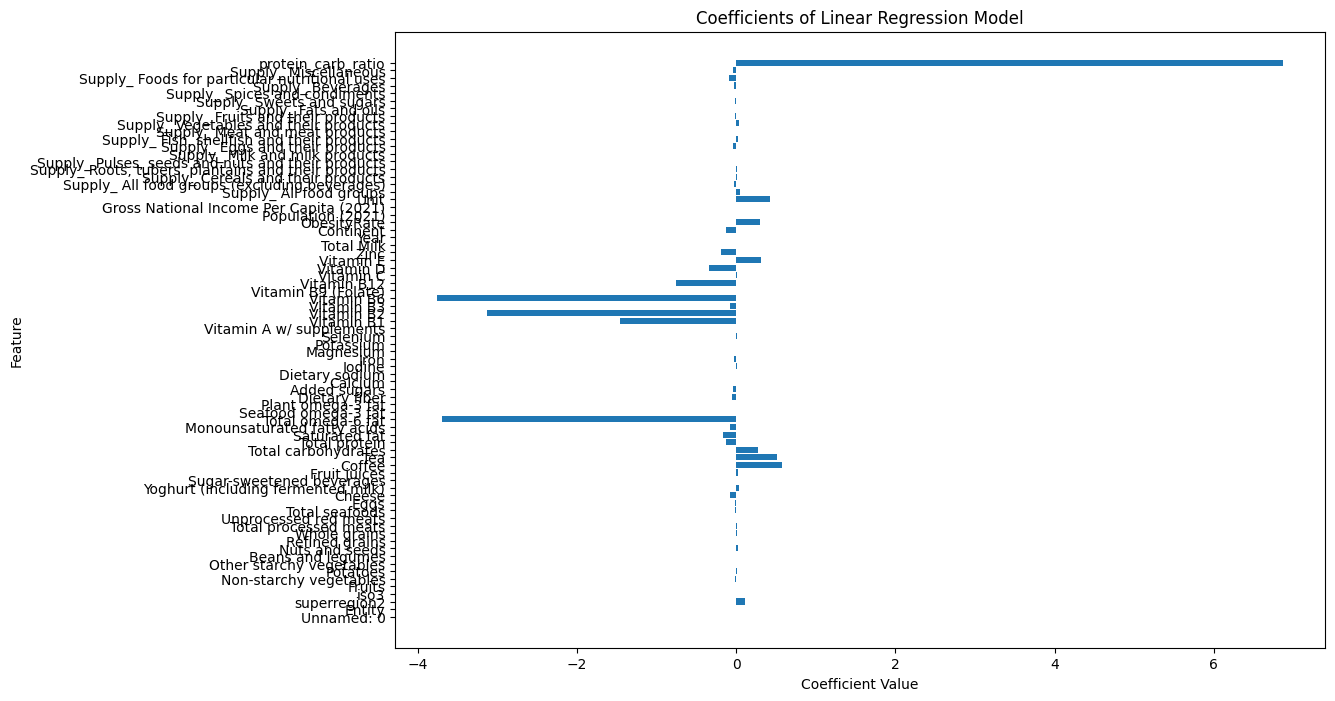

In [23]:
# Extract feature names and coefficients
feature_names = X_train.columns
coefficients = linear_reg.coef_

# Create a bar plot
plt.figure(figsize=(12, 8))
plt.barh(feature_names, coefficients)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Coefficients of Linear Regression Model')
plt.show()

**Linear Regression**

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
X = df_cleaned.drop(columns=['ObesityRate'])
y = df_cleaned['ObesityRate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Optionally, you can also print the coefficients and intercept of the linear regression model
print("Coefficients:", linear_reg.coef_)
print("Intercept:", linear_reg.intercept_)


Mean Squared Error: 107.01425873126735
Coefficients: [-2.29502323e-02  1.38797175e+00  2.73384315e-02 -9.26586630e-03
  1.02896536e-02 -1.14512708e-02 -1.85677976e-02  1.92923124e-02
  3.92721656e-02 -8.61982991e-04 -3.64657171e-02  9.96602520e-03
 -1.36823807e-02 -1.04148688e-03  1.16255446e-01  1.82190978e-01
 -6.63155152e-03 -1.31612496e-02 -3.66434889e-02 -2.06772790e+00
 -1.07852902e+00 -7.69866184e-01  6.32916763e-01  4.60923738e-01
  1.82444475e-01  1.66748276e+01 -1.52870971e-03 -4.17833504e-03
  1.04032314e-01  2.63764679e-01 -3.58971162e-04 -1.39390167e-03
 -2.06144029e-02  8.68356002e-03 -8.80709578e-03 -1.02075708e-03
 -6.64587247e-03 -9.55056190e-04  6.03274888e+00  4.91702445e+00
  2.24726852e-01 -4.40334555e-02  5.67442128e-03  2.13900129e-01
  1.37176610e-02  1.71162025e-01  1.71512424e-01 -4.33493244e-01
  1.20682392e-02 -6.96981398e-04  8.82376958e-01  3.09147561e+00
 -6.47071108e-09 -1.07696369e-05  5.34086080e-03 -3.49432672e+01]
Intercept: -10.731177120339495


**Data Visualisation**

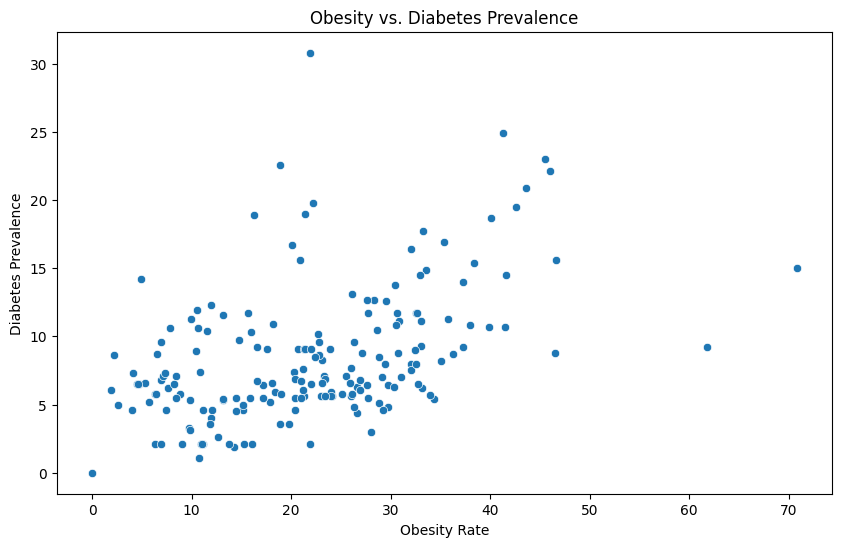

In [78]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ObesityRate', y='Diabetes prevalence (% of population ages 20 to 79)', data=df_cleaned)
plt.title('Obesity vs. Diabetes Prevalence')
plt.xlabel('Obesity Rate')
plt.ylabel('Diabetes Prevalence')
plt.show()

**Imputation**

In [73]:
imputer = SimpleImputer(strategy='median')  # You can change the strategy as needed
X_imputed = imputer.fit_transform(X)

**Dimensionality Reduction (PCA)

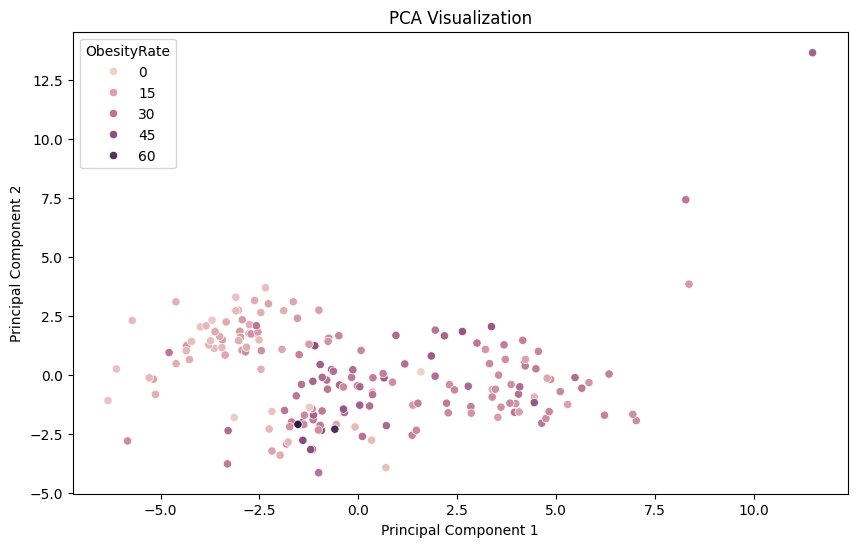

In [74]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y)
plt.title('PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()